In [11]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/Users/siddharthsunkam/Downloads/Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(data_path)

# Data Preprocessing
# Imputation with KNN
imputer = KNNImputer(n_neighbors=5)
numeric_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
sleep_data[numeric_columns] = imputer.fit_transform(sleep_data[numeric_columns])

# Encoding categorical variables
nominal_columns = ['Occupation', 'Sleep Disorder']
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(sleep_data[nominal_columns]).toarray()
encoded_cols = one_hot_encoder.get_feature_names_out(nominal_columns)
sleep_data = sleep_data.join(pd.DataFrame(encoded_data, columns=encoded_cols, index=sleep_data.index))
sleep_data.drop(columns=nominal_columns, inplace=True)

# Handling other categorical columns
sleep_data['Gender'] = sleep_data['Gender'].map({'Female': 0, 'Male': 1})
bmi_dummies = pd.get_dummies(sleep_data['BMI Category'], prefix='BMI')
sleep_data = pd.concat([sleep_data, bmi_dummies], axis=1)
sleep_data.drop('BMI Category', axis=1, inplace=True)
sleep_data[['Systolic BP', 'Diastolic BP']] = sleep_data['Blood Pressure'].str.split('/', expand=True).astype(float)
sleep_data.drop('Blood Pressure', axis=1, inplace=True)

# Assuming 'Quality of Sleep' is ordinal
ordinal_columns = ['Quality of Sleep']
ordinal_encoder = OrdinalEncoder()
sleep_data[ordinal_columns] = ordinal_encoder.fit_transform(sleep_data[ordinal_columns])

# Normalization
scaler = StandardScaler()
sleep_data[numeric_columns] = scaler.fit_transform(sleep_data[numeric_columns])

# Advanced Statistical Analysis
# Multivariate Regression
X = sleep_data.drop('Sleep Duration', axis=1)
y = sleep_data['Sleep Duration']
X = sm.add_constant(X)  # Add a constant column for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())

# Predictive Modeling and Machine Learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_predictions)}")
print(f"Random Forest R^2: {r2_score(y_test, rf_predictions)}")

# SVM Regressor
svm = SVR()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(f"SVM MSE: {mean_squared_error(y_test, svm_predictions)}")
print(f"SVM R^2: {r2_score(y_test, svm_predictions)}")

# Neural Network Regressor
nn = MLPRegressor(max_iter=1000)
nn.fit(X_train, y_train)
nn_predictions = nn.predict(X_test)
print(f"Neural Network MSE: {mean_squared_error(y_test, nn_predictions)}")
print(f"Neural Network R^2: {r2_score(y_test, nn_predictions)}")


                            OLS Regression Results                            
Dep. Variable:         Sleep Duration   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.78e-171
Time:                        18:24:58   Log-Likelihood:                -65.960
No. Observations:                 374   AIC:                             183.9
Df Residuals:                     348   BIC:                             286.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

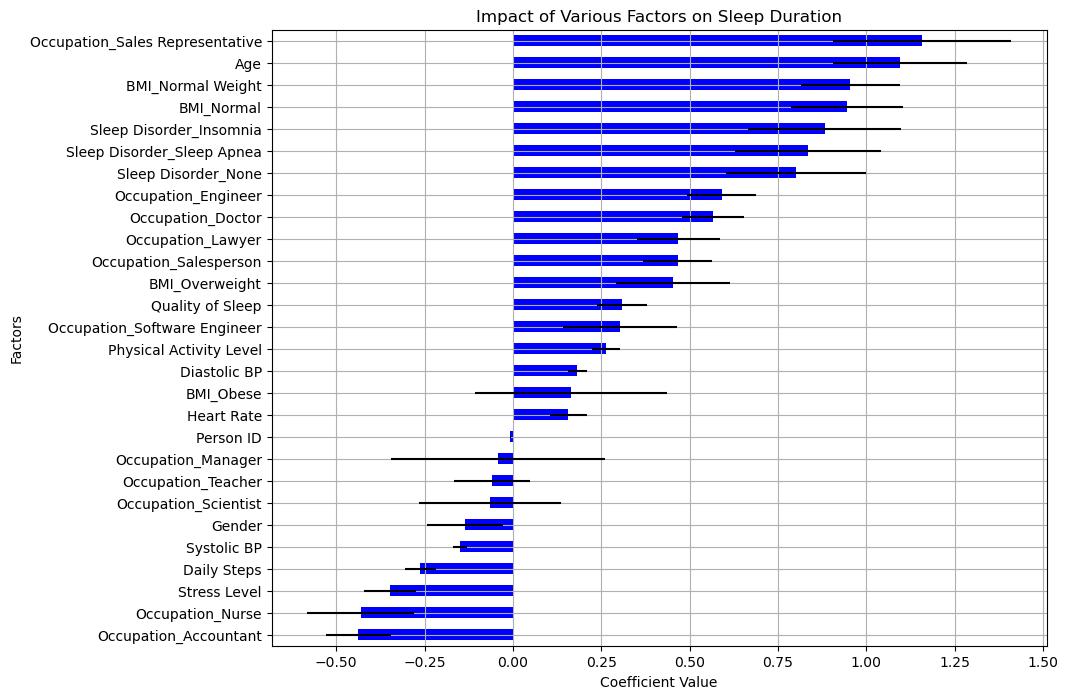

In [8]:
import matplotlib.pyplot as plt

# Assuming 'model' is your fitted OLS model from statsmodels
coefficients = model.params
errors = model.bse

# Create a DataFrame from coefficients and errors
coef_df = pd.DataFrame({'coef': coefficients, 'err': errors})
coef_df = coef_df.drop('const')  # Drop the intercept for visualization

# Sorting values for better visualization
coef_df = coef_df.sort_values('coef', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
coef_df['coef'].plot(kind='barh', xerr=coef_df['err'], color='b')
plt.title('Impact of Various Factors on Sleep Duration')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.grid(True)
plt.show()


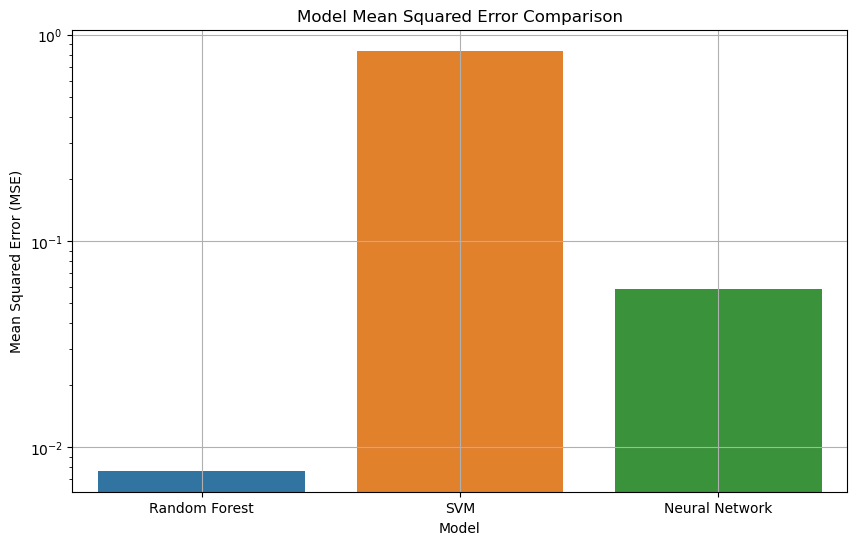

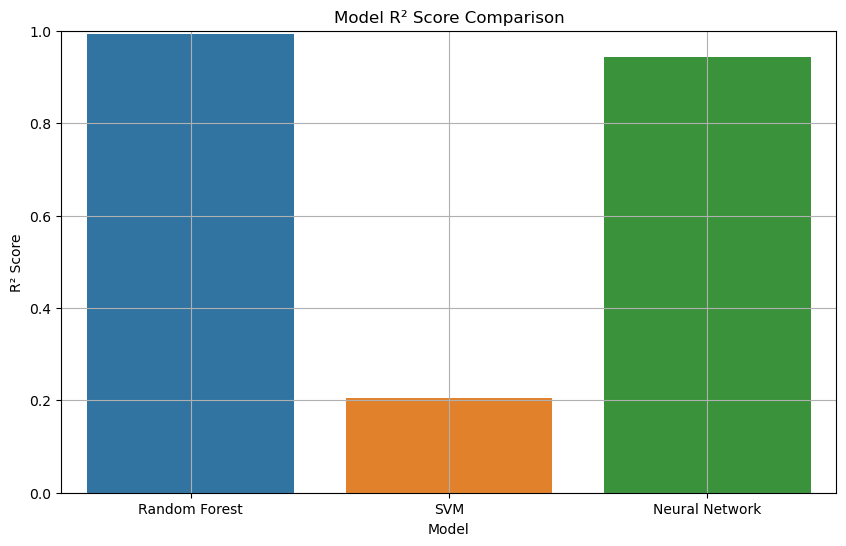

In [9]:
# Data preparation
model_performance = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Neural Network'],
    'MSE': [mean_squared_error(y_test, rf_predictions),
            mean_squared_error(y_test, svm_predictions),
            mean_squared_error(y_test, nn_predictions)],
    'R^2': [r2_score(y_test, rf_predictions),
            r2_score(y_test, svm_predictions),
            r2_score(y_test, nn_predictions)]
})

# MSE Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=model_performance)
plt.title('Model Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.yscale('log')  # Use logarithmic scale if MSE values vary significantly
plt.grid(True)
plt.show()

# R^2 Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=model_performance)
plt.title('Model R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Limit to show the range between 0 and 1 for R^2
plt.grid(True)
plt.show()


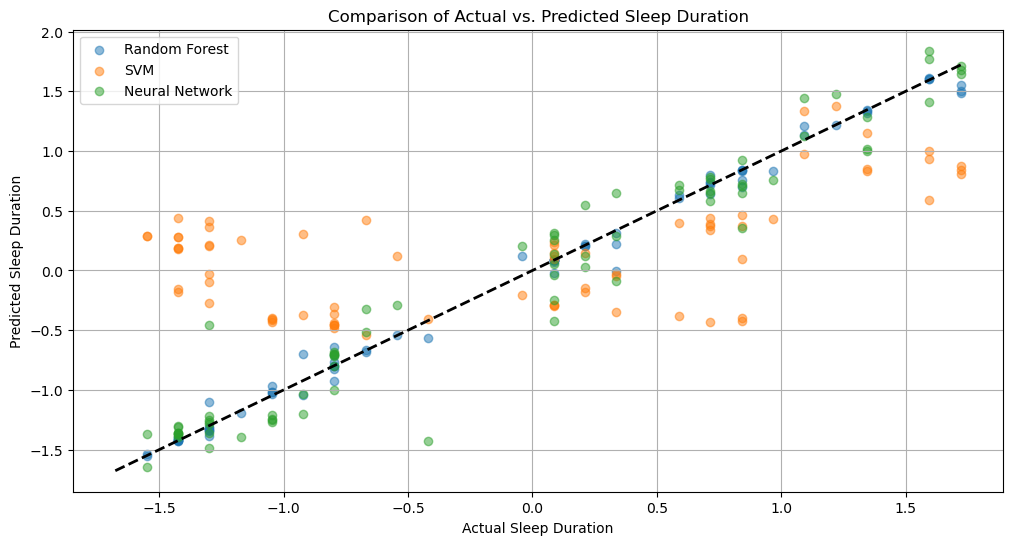

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest')
plt.scatter(y_test, svm_predictions, alpha=0.5, label='SVM')
plt.scatter(y_test, nn_predictions, alpha=0.5, label='Neural Network')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Comparison of Actual vs. Predicted Sleep Duration')
plt.xlabel('Actual Sleep Duration')
plt.ylabel('Predicted Sleep Duration')
plt.legend()
plt.grid(True)
plt.show()
